In [5]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import re

In [12]:
# Carregando o dataset de filmes e creditcard

df_creditcard = pd.read_csv('./dados/creditcard.csv')
df_creditcard.info()

# Verificando se há valores ausentes 
print(df_creditcard.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [13]:
# Definindo as variáveis X e y

X = df_creditcard.drop(columns=['Class'])
y = df_creditcard['Class']

# Encontrado Erro na Normalização dos dados CreditCard Corregindo esse Erro

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [14]:
# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão logística
model_credit_card = LogisticRegression(max_iter=5000, solver= 'lbfgs', class_weight='balanced').fit(X_train, y_train)

In [15]:
y_pred = model_credit_card.predict(X_test)
y_prob = model_credit_card.predict_proba(X_test)[:, 1]

# Avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


print('Relatorio de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.9764
Precisão: 0.0630
Recall: 0.9184
F1-Score: 0.1179
Relatorio de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962



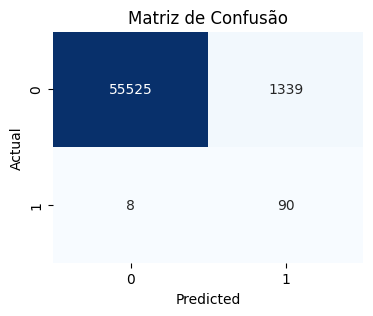

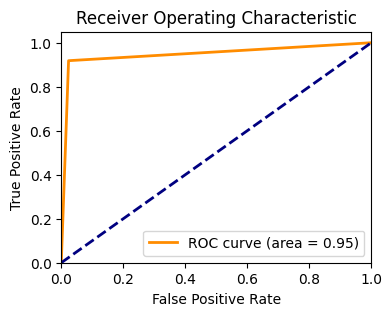

AUC final do modelo desbalanceado: 0.9474


In [16]:
# Gerando a Matriz de Confusão

plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

# Gerando a Curva ROC
plt.figure(figsize=(4, 3))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Exibir AUC
print(f"AUC final do modelo desbalanceado: {roc_auc:.4f}")

### Conclusao do Modelo

Link do dataset: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

Relatório Final: Detecção de Fraudes com Regressão Logística
#### 1. Descrição do Problema e Dataset


Objetivo: Detectar transações fraudulentas em cartões de crédito usando Regressão Logística.

Dataset: Credit Card Fraud Detection (Kaggle), com 284.807 transações.

Variáveis: 28 features anônimas (V1-V28, resultantes de PCA), Time (tempo desde a primeira transação), Amount (valor), Class (0 = normal, 1 = fraude).

Desbalanceamento: Apenas 0.17% das transações são fraudes (classe minoritária).

#### 2. Preparação dos Dados


Divisão de Features: Separação entre variáveis preditoras (V1-V28, Time, Amount) e alvo (Class).

Normalização: Padronização das features com StandardScaler para evitar viés de escala.

Treino/Teste: Divisão em 80% treino e 20% teste (random_state=42 para reprodutibilidade).

#### 3. Resultados da Regressão Logística


Acurácia: 99.91% (alta devido ao desbalanceamento, mas enganosa).

Precisão: 86.36% (86% das previsões de fraude estão corretas).

Recall: 58.16% (apenas 58% das fraudes reais são detectadas).

F1-Score: 69.51% (equilíbrio moderado entre precisão e recall).

#### 4. Avaliação do Modelo

Matriz de Confusão:

56.864 verdadeiros negativos (transações normais corretamente identificadas).

57 verdadeiros positivos (fraudes detectadas).

41 falsos negativos (fraudes não detectadas – crítico).

Curva ROC (AUC = 0.78): Desempenho moderado, mas insuficiente para um problema crítico como fraude.

#### 5. Reflexões e Melhorias


Problemas Identificados:

Baixo recall (fraudes não detectadas são inaceitáveis na prática).

Métricas infladas pelo desbalanceamento (classe majoritária domina a acurácia).

 #### Sugestões de Melhoria:

Tratar Desbalanceamento: Técnicas como SMOTE, oversampling da classe minoritária ou undersampling da maioria.

Experimentar Outros Modelos: Algoritmos como Random Forest ou XGBoost, que lidam melhor com desbalanceamento.

Ajustar Hiperparâmetros: Otimizar thresholds de classificação para priorizar recall.

Métricas Prioritárias: Focar em AUC-PR (Precision-Recall) ou Recall puro, mais relevantes para fraudes.

Validação Cruzada Estratificada: Garantir representatividade das classes minoritárias durante a validação.

#### Conclusão: 
O modelo tem alta acurácia, mas falha em detectar fraudes críticas (baixo recall). A Regressão Logística não é ideal para esse cenário desbalanceado. São necessárias técnicas específicas para melhorar a detecção de fraudes e reduzir riscos operacionais.

# TESTE DE BALANCEAMENTO


In [3]:
'''
Interpretação do que é positivo e o que é negativo:

0: Negativo
1: Positivo

Verdadeiro negativo (VN): 265 previsto negativo (0) e real negativo (0)

Falso negativo (FN): 14 previsto negativo (0) e real positivo (1)

Verdadeiro positivo (VP): 18 previsto positivo (1) e real positivo (1)

Falso positivo (FP): 3 previsto positivo (1) e real negativo (0)

'''

'\nInterpretação do que é positivo e o que é negativo:\n\n0: Negativo\n1: Positivo\n\nVerdadeiro negativo (VN): 265 previsto negativo (0) e real negativo (0)\n\nFalso negativo (FN): 14 previsto negativo (0) e real positivo (1)\n\nVerdadeiro positivo (VP): 18 previsto positivo (1) e real positivo (1)\n\nFalso positivo (FP): 3 previsto positivo (1) e real negativo (0)\n\n'

# Usando o Label Enconder

In [35]:
df_churn = pd.read_csv('./dados/Churn.csv')
df_churn.head()


,intl_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churned
0,0.0,1.0,25.0,265.1,110.0,45.07,197.4,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,False
1,0.0,1.0,26.0,161.6,123.0,27.47,195.5,103.0,16.62,254.4,103.0,NaN,NaN,3.0,3.70,1.0,False
2,0.0,0.0,0.0,243.4,114.0,41.38,121.2,NaN,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,False
3,1.0,0.0,0.0,299.4,NaN,50.90,61.9,88.0,5.26,NaN,89.0,8.86,6.6,7.0,1.78,2.0,False
4,1.0,0.0,0.0,166.7,113.0,28.34,148.3,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,False


In [36]:
total_null = df_churn.isnull().sum().sort_values(ascending=False)
percent_null = (total_null/df_churn.shape[0]).sort_values(ascending=False)
df_churn.fillna(0, inplace=False )


print('-' * 40)
print(percent_null * 100)

----------------------------------------
total_night_minutes              9.26
total_eve_calls                  8.70
number_customer_service_calls    8.14
voice_mail_plan                  8.06
total_day_calls                  7.58
total_eve_charge                 7.52
total_day_minutes                7.40
total_day_charge                 6.74
total_intl_calls                 6.40
total_intl_minutes               6.18
total_intl_charge                6.06
intl_plan                        3.70
total_night_calls                3.56
number_vmail_messages            3.22
total_eve_minutes                2.12
total_night_charge               1.92
churned                          0.00
dtype: float64


In [37]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_churn['churned'] = le.fit_transform(df_churn['churned'])

In [49]:
df_churn.groupby('churned').size()


churned
0    4293
1     707
dtype: int64

In [43]:
# Definindo as variáveis X e y

X = df_churn.drop(columns=['churned', ])
y = df_churn['churned']

# Encontrado Erro na Normalização dos dados CreditCard Corregindo esse Erro

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Criando o modelo de regressão logística
from sklearn.ensemble import HistGradientBoostingClassifier

model_churned = HistGradientBoostingClassifier(class_weight='balanced').fit(X_train, y_train)
y_pred = model_churned.predict(X_test)
y_prob = model_churned.predict_proba(X_test)[:, 1]

# Avaliando o modelo
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Acurácia: {accuracy:.4f}")
print(f"Precisão: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


print('Relatorio de Classificação:')
print(classification_report(y_test, y_pred))

Acurácia: 0.9520
Precisão: 0.8421
Recall: 0.8058
F1-Score: 0.8235
Relatorio de Classificação:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       861
           1       0.84      0.81      0.82       139

    accuracy                           0.95      1000
   macro avg       0.91      0.89      0.90      1000
weighted avg       0.95      0.95      0.95      1000



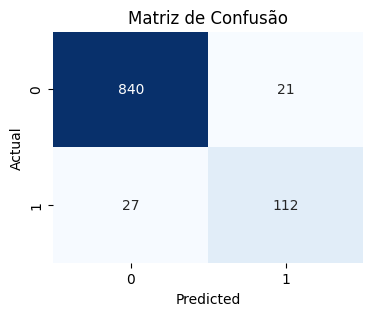

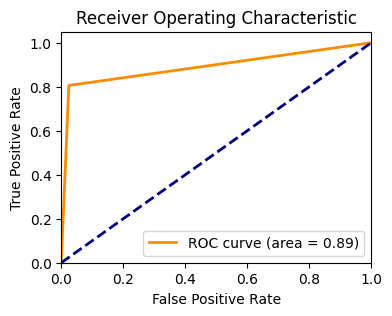

AUC final do modelo desbalanceado: 0.8907


In [44]:
# Gerando a Matriz de Confusão

plt.figure(figsize=(4, 3))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusão')
plt.show()

# Gerando a Curva ROC
plt.figure(figsize=(4, 3))
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Exibir AUC
print(f"AUC final do modelo desbalanceado: {roc_auc:.4f}")